# Predicting Heart Disease Diagnosis with Serum Cholesterol and Blood Pressure

## Introduction

Heart disease is a major worldwide health concern because it is a common and potentially fatal disorder. To better understand, diagnose, and forecast heart illnesses, academics and healthcare practitioners are utilizing data-driven approaches thanks to technological advancements and the growing availability of health-related statistics. The UCI heart disease dataset stands as a valuable resource in this pursuit, offering a comprehensive set of attributes that can be analyzed to uncover patterns and insights related to cardiovascular health. The primary objective of this project is to address the question: **"Can we predict heart disease diagnoses based on serum cholesterol and blood pressure?"** using a knn classification model. High Serum cholesterol and blood pressure are two commonly cited risk factors for heart disease; high cholesterol levels can build up in the walls of the arteries which can decrease the blood flow to the heart and high blood pressure can cause arteries to become hard and thick which can also decrease blood flow to the heart.

The data set includes many observations of individuals admitted to  a Cleveland hospital with 14 variables, the two relevant to our preliminary analysis are:
1) chol: serum cholestoral	(mg/dl)
2) trest_bps: resting blood pressure (on admission to the hospital)	(mm Hg)

## Methods & Results

#### Importing Libraries

Let's start by loading the neccessary libraries for this project.

In [33]:
library(tidyverse)
library(tidymodels)
library(repr)

#### Loading the Dataset

Now let's load the ICU cleveland heart dataset from the web using the `read_csv` function since the dataset is comma seperated.

In [34]:
heart_disease <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names=FALSE)
head(heart_disease)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


figure 1

#### Cleaning and Wrangling the Dataset

As we can see in the table, we don't have any column names. Let's use the `col_names` function to name each column and replace the ? values with NA. We should also create another variable `diag` as a factor that classifies each observation as either being diagnosed with heart disease or not without the range which will be easier to visualize. We will have to use a new function `ifelse` in order to achieve this. Then let's create a new tibble with the variables relevant to our analysis.

In [35]:
set.seed(1)

heart_disease_clean <- setNames(heart_disease, c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",  "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) |> 
    mutate(diagn=ifelse(is.na(num), NA, ifelse((num>0), "yes", "no")), diagn=as_factor(diagn))

head(heart_disease_clean)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diagn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,no
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,yes
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,yes
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,no
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,no
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,no


figure 2

#### Creating the training and testing split

Before we can perform our preliminary exploratory data analysis we need to split our data into training and testing sets. We will use a 75% split of training to testing which is a reasonable trade-off between training an accurate model and getting an accurate evaluation of its performance.

In [36]:
heart_disease_split <- initial_split(heart_disease_clean, prop = 0.75, strata = diagn)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

#### Summarizing the Relationship Between the Predictors and the Class

Now that we have a training/testing split we can summarize the relationship between the predictors, blood preasure and cholesterol, and the class, the diagnosis. We can do this by calculating the mean cholesterol and blood pressure for those who were diagnosed with hard disease and those who weren't. To do this we will use the `group_by` and `summarize` functions.

In [37]:
heart_disease_summary <- heart_disease_train |>
    group_by(diagn) |>
    summarize(mean_chol=mean(chol), mean_trestbps=mean(trestbps))
heart_disease_summary

diagn,mean_chol,mean_trestbps
<fct>,<dbl>,<dbl>
no,243.9106,130.4553
yes,250.5673,135.5096


figure 3

We can see that those diagnosed with heart disease tend to have a slightly higher mean serum cholesterol levels and mean resting blood pressure which is expected, however it is unexpected that the difference is so small.

#### Visualizing the Relationship Between the Predictors and the Class

Now let's visualize the relationship. We will use `ggplot` to create a scatter plot with each point being coloured as the class value, whether the patient was diagnosed with heart disease or not.

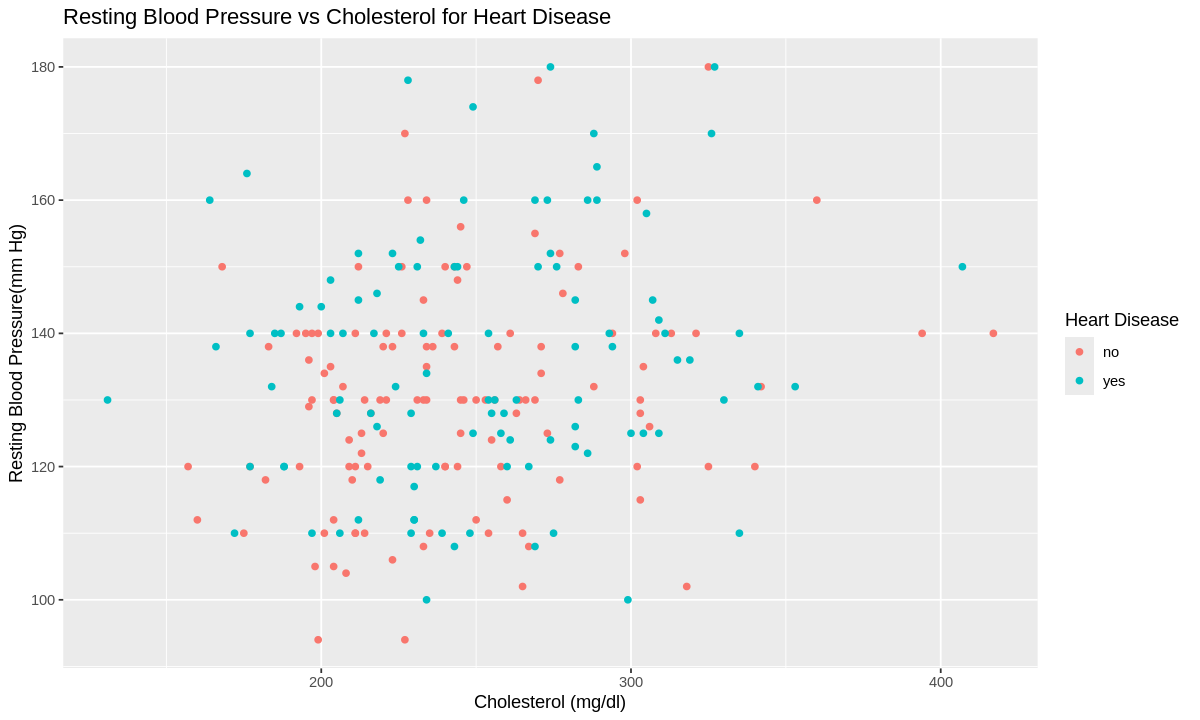

In [57]:
options(repr.plot.width = 10, repr.plot.height = 6)

chol_vs_trestbps <- ggplot(heart_disease_train, aes(x=chol, y=trestbps, color=diagn)) +
    geom_point() +
    labs(x="Cholesterol (mg/dl)", y="Resting Blood Pressure(mm Hg)", color="Heart Disease", title="Resting Blood Pressure vs Cholesterol for Heart Disease") +
    scale_color_manual(values = c("yes" = "#00BFC4", "no" = "#F8766D"))

chol_vs_trestbps

figure 4

#### Preliminary Observations

The graph does not show a clear trend between cholesterol and resting bloodpressure in terms of heart disease diagnosis. The data set's limited size or the inherent complexity of heart disease diagnosis may contribute to this observation. However, it is important to note that an unclear trend does not necessarily hinder our classification task. K-nearest neighbors relies on the similarities of data points rather than the pressence of a clear trend.

#### Creating the K-Nearest Neighbors Classification Model

Now we will move on to the actual data analysis using the K-nearest neighbors classification model. To do that we need to find optimal number of neighbors (*k*) by maximizing estimated cross-validation accuracy. We will find the optimal *k* by preprocessing and standardizing the data using the `recipe` framework, training the classifier with `nearest_neighbor`, and putting it all together into a `workflow` with a 10 fold cross validation.

In [92]:
set.seed(1234)

heart_recipe <- recipe(diagn ~ chol + trestbps, data = heart_disease_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

heart_fold <- vfold_cv(heart_disease_train, v=10, strata = diagn)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors=tune()) |>
    set_mode("classification") |>
    set_engine("kknn")

heart_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples=heart_fold) |>
    collect_metrics() |>
    filter(.metric == "accuracy") |>
    select(neighbors, mean) |>
    arrange(desc(mean))

head(workflow)

neighbors,mean
<int>,<dbl>
11,0.5963109
12,0.5917655
14,0.5874012
9,0.5767951
7,0.5614625
6,0.5525527


figure 5

As we can see 11 neighbors produces the lowest standard error of 59.6%. We will use this as our *k* value. Let's visualize the *k* distribution more clearly using `geom_line`.

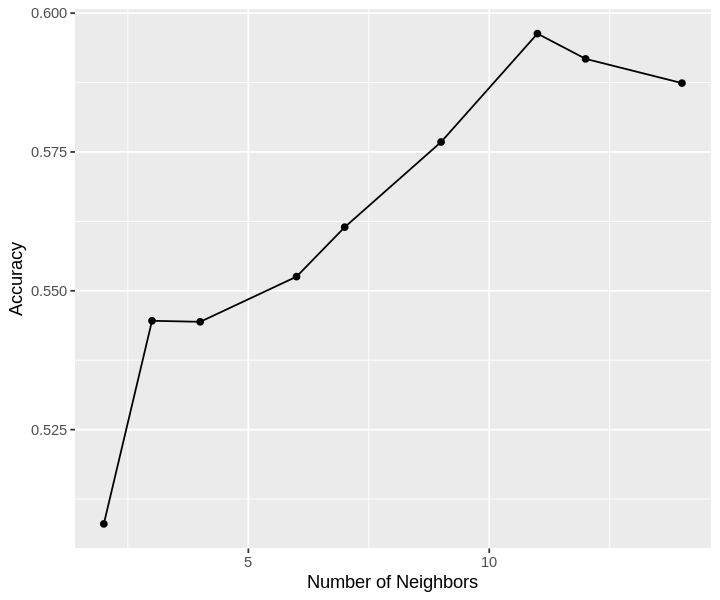

In [93]:
options(repr.plot.height = 5, repr.plot.width = 6)

cross_val_plot <- workflow |>
    ggplot(aes(x=neighbors, y=mean)) +
    geom_point() +
    geom_line() +
    labs(x="Number of Neighbors", y="Accuracy")

cross_val_plot

figure 6

#### Creating the Final Classifier Model

Now that we have our *k* value we can create our final model with *k* = 11 and our testing data set.

In [97]:
knn_spec <- nearest_neighbor(weight_func="rectangular", neighbors = 11) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit <- workflow() |>
    add_recipe(heart_recipe) |>
    add_model(knn_spec) |>
    fit(data=heart_disease_test)

heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(11,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.5789474
Best kernel: rectangular
Best k: 11

#### Testing Our Classifier

Now that we have completed our k-nn classifier it is time to evaluate the quality of its predictions on the test data. We use the `predict` and `metrics` functions and then pass those predictions to the precision, recall, and conf_mat functions to assess the estimated precision and recall, and print a confusion matrix.

In [129]:
heart_test_predictions <- predict(heart_fit, heart_disease_test) |>
    bind_cols(heart_disease_test)

heart_test_accuracy <- heart_test_predictions |>
    metrics(truth = diagn, estimate = .pred_class) |>
    filter(.metric == "accuracy")

heart_test_recall <- heart_test_predictions |>
    recall(truth = diagn, estimate = .pred_class, event_level="first")

heart_test_confusion <- heart_test_predictions |>
    conf_mat(truth = diagn, estimate = .pred_class)

heart_test_metrics
heart_test_recall
heart_test_confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5657895


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.6585366


          Truth
Prediction no yes
       no  27  19
       yes 14  16

figure 7

The accuracy of the classifier on the test data is 56% which is pretty close to the 60% accuracy on the training data. The recall is higher at 66% which is good since we want to have as few false negatives as possible when diagnosing heart disease. The prediction matrics tells us that our classifier successfully predicted 43 out of 76 diagnoses and is more likely to over diagnose rather than under diagnose whcih is better as the consequencees of a false negative are much higher than a false positive.

## Discussion

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Quisque gravida porta nibh, at convallis nisl sodales gravida. Curabitur non tincidunt orci. Praesent malesuada dapibus lectus at maximus. Praesent hendrerit libero sed ligula aliquam vehicula. Suspendisse nec ultricies massa, vel vulputate nunc. Quisque lacus leo, rutrum vitae arcu ut, molestie hendrerit orci. Ut convallis ac metus vel lacinia. Ut nec faucibus eros, ut dictum augue. Morbi posuere sem et congue sagittis. Curabitur vitae eros eget nulla interdum luctus. Nunc condimentum nibh in mauris accumsan mattis. Quisque faucibus, nisi quis faucibus pellentesque, sapien purus laoreet tortor, quis venenatis leo tellus sit amet velit.

## References

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.